# Signals and Systems - Fall 2020
## Programming exercise - Discretization
Created: 11/14/2013 - Federico Augugliaro

Revisions: 

09/22/2014 - Federico Augugliaro

09/21/2016 - Anton Ledergerber

09/25/2019 - Andrea Carron
           
09/15/2020 - David Helm (translation to Python)


In [1]:
#import statements
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import linalg

In [2]:
tFinal = 15

# parameters
m = 1
b = 0.5
k = 1
Ts = 0.05 # for 4e
# Ts = 0.25; # for 4f)
# Ts = 0.75; # for 4g) 

## Input

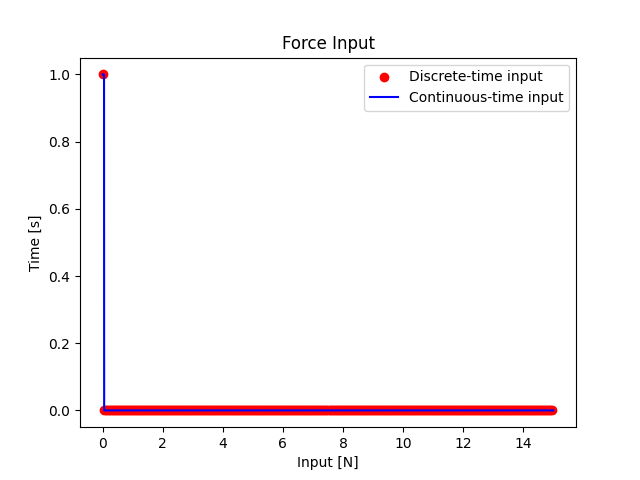

In [3]:
# Discrete-time
td = np.arange(0, tFinal, Ts)
ud = np.zeros(len(td))
ud[0] = 1

#Equivalent continuous-time signal
dt=0.0001;
t = np.arange(0, tFinal, dt)
u = np.zeros(len(t));
u[np.where(t < Ts)] = 1;

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(td, ud, marker='o', c='r', label='Discrete-time input')
ax.plot(t,u, c='b', label= 'Continuous-time input')
ax.legend()
plt.title('Force Input')
ax.set(xlabel='Input [N]', ylabel='Time [s]')
plt.show()


## System

/home/thesmilingturtle/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


[[ 1.975  -0.9775]
 [ 1.      0.    ]]
[[1.]
 [0.]]
[[0.     0.0025]]
[[0.]]

[[ 1.     0.05 ]
 [-0.05   0.975]]
[[0.  ]
 [0.05]]
[1 0]
[[0]]


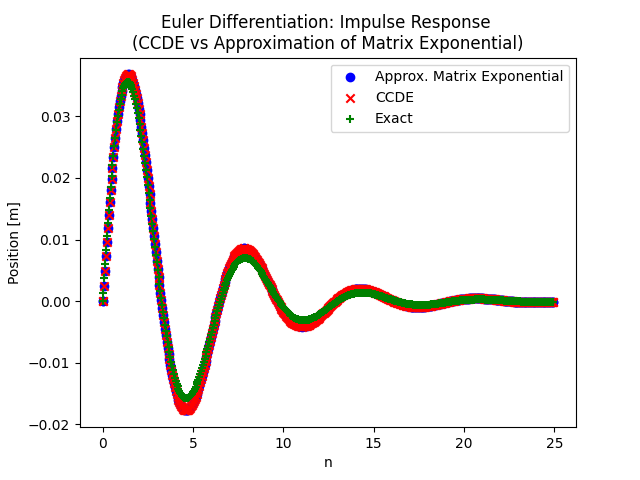

In [4]:
# Continuous-time state-space representation
# see sample solution for how to derive the matrices

A = np.array([[0, 1], [-k/m, -b/m]])
B = np.array([[0], [1/m]])
C = np.array([1, 0])
D = np.array([[0]])


# Euler discretization #ISSUE here some small errors arise compared to matlab
# see sample solutions for how to derive constant coefficient difference equation
a2 = k - b/Ts + m/(Ts**2)
a1 = b/Ts - 2 * m/(Ts**2)
a0 = m/(Ts**2)
b2 = 1
num = np.array([0, 0, b2])
den = np.array([a0, a1, a2])
Ad1, Bd1, Cd1, Dd1 = signal.tf2ss(num,den)

print(Ad1)
print(Bd1)
print(Cd1)
print(Dd1)

# First-order matrix exponential approximation (corresponds to the Euler
# Discretization (forward method))
# see lecture notes

Ad1_2 = np.eye(A.shape[0]) + A*Ts
Bd1_2 = B*Ts
Cd1_2 = C
Dd1_2 = D

print()
print(Ad1_2)
print(Bd1_2)
print(Cd1_2)
print(Dd1_2)


# Compare both systems: they are the same! (Impulse response: see lecture 2).
h, n = signal.dimpulse(signal.StateSpace(Ad1, Bd1, Cd1, Dd1, dt=Ts), n=int(25/Ts))
h1, n1 = signal.dimpulse(signal.StateSpace(Ad1_2, Bd1_2, Cd1_2, Dd1_2, dt=Ts), n=int(25/Ts))


fig2 = plt.figure()
ax = fig2.add_subplot(111)

ax.scatter(h1, n1, marker='o', c='b', label='Approx. Matrix Exponential')
ax.scatter(h, n, marker='x', c='r', label='CCDE')
plt.title('Euler Differentiation: Impulse Response \n(CCDE vs Approximation of Matrix Exponential)')
ax.set(xlabel='n', ylabel='Position [m]')


# Exact discretization

n = A.shape[0]

F = np.block([[A, B], [np.zeros_like(C), np.zeros_like(D)]])

M = linalg.expm(F*Ts)

Ad2 = M[:n,:n]
Bd2 = M[:n,n:]
Cd2 = C
Dd2 = D

h2, n2 = signal.dimpulse(signal.StateSpace(Ad2, Bd2, Cd2, Dd2, dt=Ts), n=int(25/Ts))

ax.scatter(h2, n2, marker='+', c='g', label='Exact')

ax.legend()
plt.show()

/home/thesmilingturtle/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


[[ 1.975  -0.9775]
 [ 1.      0.    ]]
[[1.]
 [0.]]
[[0.     0.0025]]
[[0.]]

[[ 1.     0.05 ]
 [-0.05   0.975]]
[[0.  ]
 [0.05]]
[1 0]
0


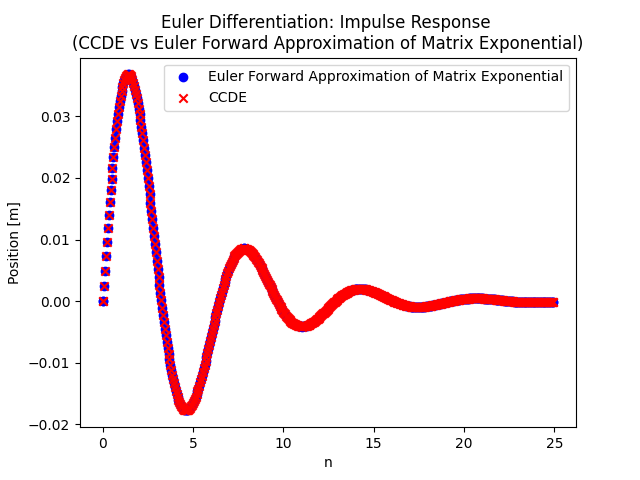

In [6]:
# Continuous-time state-space representation
# see sample solution for how to derive the matrices
A = np.array([[0, 1],[-k/m, -b/m]])
B = np.array([[0], [1/m]])
C = np.array([1, 0])
D = 0;

# Euler discretization
# see sample solutions for how to derive constant coefficient difference equation
a2 = k - b/Ts + m/Ts**2
a1 = b/Ts - 2*m/Ts**2
a0 = m/Ts**2
b2 = 1
num = np.array([0, 0, b2])
den = np.array([a0, a1, a2])
Ad, Bd, Cd, Dd = signal.tf2ss(num,den)


print(Ad)
print(Bd)
print(Cd)
print(Dd)

# First-order matrix exponential approximation (euler forward)
# size of q=[p,p_dot]
n = B.shape[0]; 
# size of of u
m = B.shape[1]
M = np.block([[A, B], [np.zeros((m,n+m))]])
F = np.eye(n+m) + Ts*M

Ad_euler = F[:n,:n]
Bd_euler = F[:n,n:]
Cd_euler = C
Dd_euler = D

print()
print(Ad_euler)
print(Bd_euler)
print(Cd_euler)
print(Dd_euler)

# Compare both systems: they are the same! (Impulse response: see lecture 2).
h_ccde, n_ccde = signal.dimpulse(signal.StateSpace(Ad, Bd, Cd, Dd, dt=Ts), n=int(25/Ts));
h_euler, n_euler = signal.dimpulse(signal.StateSpace(Ad_euler, Bd_euler, Cd_euler, Dd_euler, dt=Ts), n=int(25/Ts));

fig2 = plt.figure()
ax = fig2.add_subplot(111)

ax.scatter(h_euler, n_euler, marker='o', c='b', label='Euler Forward Approximation of Matrix Exponential')
ax.scatter(h_ccde, n_ccde, marker='x', c='r', label='CCDE')
ax.legend()
plt.title('Euler Differentiation: Impulse Response \n(CCDE vs Euler Forward Approximation of Matrix Exponential)')
ax.set(xlabel='n', ylabel='Position [m]')

plt.show()

# Exact discretization
M = np.block([[A, B], [np.zeros((m,n+m))]])
F = linalg.expm(Ts*M)

Ad_exact = F[:n,:n]
Bd_exact = F[:n,n:]
Cd_exact = C
Dd_exact = D

## Response

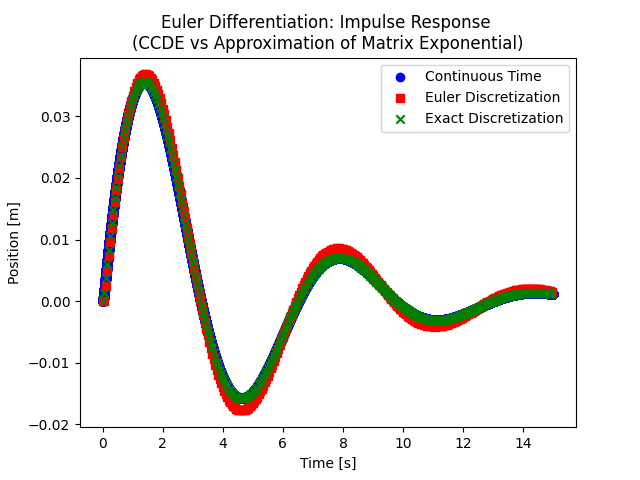

In [15]:
p = signal.lsim(signal.StateSpace(A,B,C,D),u,t,interp=False); #The input is constant between timesteps (Because of the zero-order hold)
p1 = signal.dlsim((Ad1,Bd1,Cd1,Dd1,Ts),ud)
p2 = signal.dlsim((Ad2,Bd2,Cd2,Dd2,Ts),ud)


fig3 = plt.figure()
ax = fig3.add_subplot(111)

ax.scatter(p[0], p[1], marker='o', c='b', label='Continuous Time')
ax.scatter(p1[0], p1[1], marker='s', c='r', label='Euler Discretization')
ax.scatter(p2[0], p2[1], marker='x', c='g', label='Exact Discretization')
ax.legend()
plt.title('Euler Differentiation: Impulse Response \n(CCDE vs Approximation of Matrix Exponential)')
ax.set(xlabel='Time [s]', ylabel='Position [m]')

plt.show()


## Poles

Let's have a look at the poles of the three systems:

In [16]:
print('\nPoles of continuous-time system')
print(np.linalg.eig(A)[0])

print('\nPoles of discrete-time system (Exact discretization)')
print(np.linalg.eig(Ad2)[0])

print('\nMagnitude of discrete-time system poles (Exact)');
print(abs(np.linalg.eig(Ad2)[0]))

print('\nPoles of discrete-time system (Euler discretization)')
print(np.linalg.eig(Ad1)[0])

print('\nMagnitude of discrete-time system poles (Euler)');
print(abs(np.linalg.eig(Ad1)[0]))


Poles of continuous-time system
[-0.25+0.96824584j -0.25-0.96824584j]

Poles of discrete-time system (Exact discretization)
[0.98642071+0.04779223j 0.98642071-0.04779223j]

Magnitude of discrete-time system poles (Exact)
[0.9875778 0.9875778]

Poles of discrete-time system (Euler discretization)
[0.9875+0.04841229j 0.9875-0.04841229j]

Magnitude of discrete-time system poles (Euler)
[0.988686 0.988686]
